In [283]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [220]:
df=pd.read_csv('D:\ML Industrial Training\Final project problem statement and dataset/churn_prediction.csv')
df.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [221]:
df.shape

(28382, 21)

In [222]:
df.isnull().sum()


customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [223]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

## Univariate analysis

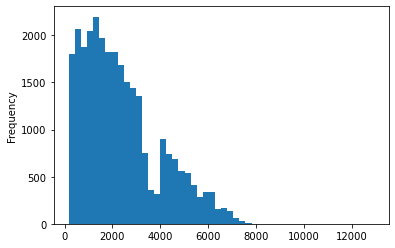

In [224]:
df['vintage'].plot.hist(bins=50)
#mostly costumers have vintage of approx 2000 days 

In [225]:
df['vintage'].mean()

2364.336445634557

Text(0.5, 0, 'age')

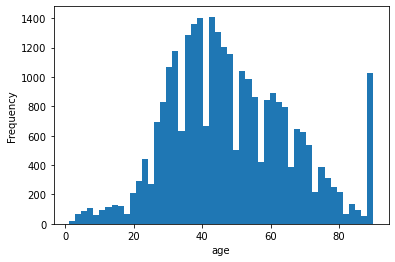

In [226]:
df['age'].plot.hist(bins=50)
plt.xlabel('age')

In [227]:
df['age'].mean(),df['age'].max(),df['age'].min()

# so we can see that avg age of costyumers is 48 and no missing values are here and no outliers 

(48.208336269466564, 90, 1)

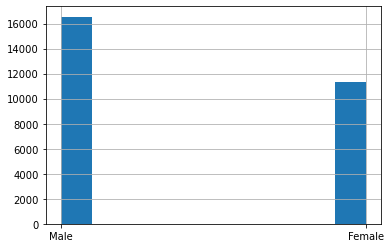

In [228]:
df['gender'].hist()
# but gender has missing values 

In [229]:
df['gender'].value_counts()
# so we can see that the missing values can be filled with male as it is mode  

Male      16548
Female    11309
Name: gender, dtype: int64

In [230]:
df['gender'].fillna(value='Male',inplace=True)
df['gender'].isnull().sum()

0

In [231]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [232]:
df['dependents']=df['dependents'].astype('object')
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [233]:
#import missing values 
df['dependents'].fillna(value=0.0,inplace=True)
df['dependents'].isnull().sum()

0

In [234]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [235]:
df['occupation'].fillna(value='self_employed',inplace=True)

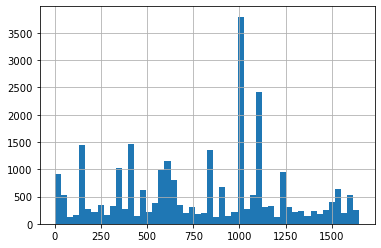

In [236]:
df['city'].hist(bins=50)

In [237]:
df['city'].value_counts() 


1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

In [238]:
t=df['city'].mean()

In [239]:
df['city'].fillna(value=t,inplace=True)

In [240]:
df['city'][1]

796.1095761267632

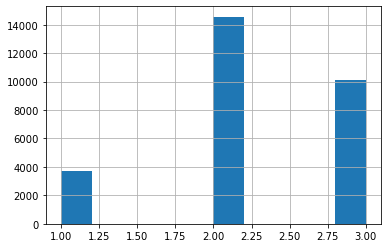

In [241]:
df['customer_nw_category'].hist()

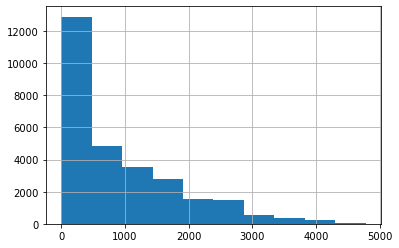

In [242]:
df['branch_code'].hist()

In [243]:
df['branch_code'].mean(),df['branch_code'].mode()

(925.9750193784794,
 0    19
 dtype: int64)

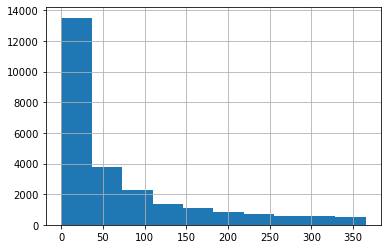

In [244]:
df['days_since_last_transaction'].hist()

In [245]:
t=df['days_since_last_transaction'].mean()

In [246]:
df['days_since_last_transaction'].fillna(value=t,inplace=True)
df['days_since_last_transaction'].isnull().sum()

0

In [247]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [248]:
# lets do the modelling
df.drop(['customer_id'],axis=1,inplace=True)
df=pd.get_dummies(df)

In [249]:
#separate dependet and independent variable
x=df.drop(['churn'],axis=1)
y=df['churn']

In [250]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()


In [251]:
mms.fit_transform(x,y)

array([[ 0.47864443,  0.99914719, -0.33087694, ..., -0.55610576,
         0.78527401, -0.27960617],
       [-1.27590918, -0.74175593, -0.33087694, ..., -0.55610576,
         0.78527401, -0.27960617],
       [-0.00517761, -0.96638859, -0.33087694, ...,  1.79821909,
        -1.27344084, -0.27960617],
       ...,
       [-1.28398323, -0.06785795, -0.33087694, ...,  1.79821909,
        -1.27344084, -0.27960617],
       [ 0.13704992,  0.10061655,  2.7994395 , ..., -0.55610576,
         0.78527401, -0.27960617],
       [-0.00952517, -1.69644473, -0.33087694, ..., -0.55610576,
        -1.27344084,  3.57645904]])

In [252]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=96,stratify=y)

In [253]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn=knn()
knn.fit(train_x , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [254]:
train=knn.predict_proba(train_x)
test=knn.predict_proba(test_x)

In [255]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import roc_auc_score

In [256]:
roc_auc_score(test_y,test[:,1]) , roc_auc_score(train_y,train[:,1])

(0.7588728777830615, 0.9213864677724806)

In [257]:
train1=knn.predict(train_x)
test1=knn.predict(test_x)

recall_score(test_y,test1) , recall_score(train_y,train1)

(0.3961977186311787, 0.49404309252218)

In [258]:
precision_score(test_y,test1) , precision_score(train_y,train1)

(0.6432098765432098, 0.7761847869374751)

In [259]:
from sklearn.model_selection import StratifiedKFold,KFold
score=StratifiedKFold(n_splits=6,shuffle=True,random_state=10)
score

StratifiedKFold(n_splits=6, random_state=10, shuffle=True)

In [260]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(x,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = x.loc[df_index],x.loc[test_index]
        ytr,yvl = y.loc[df_index],y.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        pred_val = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [261]:
knn1=cv_score(knn)
#  these are the score when we appply knn model


1 of kfold 5
ROC AUC Score: 0.7667407255163908, Recall Score: 0.3859, Precision Score: 0.6114 

2 of kfold 5
ROC AUC Score: 0.773139554002672, Recall Score: 0.4125, Precision Score: 0.6596 

3 of kfold 5
ROC AUC Score: 0.7672348435012565, Recall Score: 0.3774, Precision Score: 0.6362 

4 of kfold 5
ROC AUC Score: 0.7685966629718316, Recall Score: 0.4011, Precision Score: 0.6125 

5 of kfold 5
ROC AUC Score: 0.7623666652413593, Recall Score: 0.3755, Precision Score: 0.6134 


## Logistic Regtression

In [262]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [284]:
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [264]:
train=lr.predict_proba(train_x)
test=lr.predict_proba(test_x)

In [265]:
roc_auc_score(test_y,test[:,1]) , roc_auc_score(train_y,train[:,1])
#here we can see that the overfitting is no more but the score of test data also decreased 
#lets check cross vald for this 

(0.704311422695167, 0.7042809231278151)

In [285]:
lr1=cv_score(lr)


1 of kfold 5
ROC AUC Score: 0.7118818209844825, Recall Score: 0.1027, Precision Score: 0.7941 

2 of kfold 5
ROC AUC Score: 0.7266578974411673, Recall Score: 0.1046, Precision Score: 0.7801 

3 of kfold 5
ROC AUC Score: 0.7075867601010434, Recall Score: 0.0951, Precision Score: 0.7092 

4 of kfold 5
ROC AUC Score: 0.7145593909113634, Recall Score: 0.0989, Precision Score: 0.6933 

5 of kfold 5
ROC AUC Score: 0.6994665170642178, Recall Score: 0.0941, Precision Score: 0.7021 


##### knn model was performing better 

In [302]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=70,min_samples_split=10)

In [303]:
rfc.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [304]:
train=rfc.predict_proba(train_x)
test=rfc.predict_proba(test_x)

In [306]:
# we can also play with hyperoparameters of rfc or better/improved results

In [305]:
roc_auc_score(test_y,test[:,1]) , roc_auc_score(train_y,train[:,1])
#in this case we can see that the roc auc score is better in every condition 

(0.827198446727611, 0.9962617148937267)

In [271]:
rfc1=cv_score(rfc)


1 of kfold 5
ROC AUC Score: 0.8269949645462953, Recall Score: 0.4154, Precision Score: 0.7141 

2 of kfold 5
ROC AUC Score: 0.8428316719761587, Recall Score: 0.4401, Precision Score: 0.7666 

3 of kfold 5
ROC AUC Score: 0.8402557700277605, Recall Score: 0.4382, Precision Score: 0.7376 

4 of kfold 5
ROC AUC Score: 0.8351740012433065, Recall Score: 0.4477, Precision Score: 0.7235 

5 of kfold 5
ROC AUC Score: 0.8296533337389977, Recall Score: 0.4325, Precision Score: 0.7234 


### best prediction can be seen on rabdom forest classifier lets see in a bar plot

In [274]:
result=pd.DataFrame({'knn':knn1,'Logistic':lr1,"Random_Forest":rfc1})

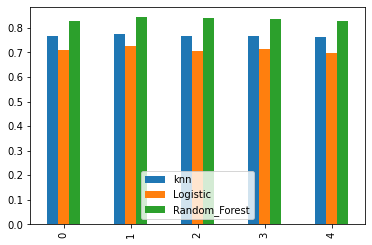

In [276]:
result.plot(kind='bar')

## RFC can be considered as best model